In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, nbinom, poisson, uniform, expon, norm 
import matplotlib.pyplot as plt
import statistics as st
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
# define column types
types = {
  'Idade': int,
  'Renda': float,  
  'Genero': str, 
  'Renda': float,
  'Bairro': str, 
  'Quest. 5': str, 
  'Quest. 6': str, 
  'Quest. 7': str, 
  'Quest. 8': str, 
  'Quest. 9': str, 
  'Quest. 10': str, 
  'Quest. 11': str,
  'Quest. 12': str,
  'Quest. 13': str, 
  'Quest. 14': str, 
  'Quest. 15': str, 
  'Quest. 16': str, 
  'Quest. 17': str, 
  'Quest. 18': str, 
  'Quest. 19': str, 
  'Quest. 20': str, 
  'Quest. 21': str, 
  'Quest. 22': str, 
}

In [3]:
df2 = pd.read_csv("https://raw.githubusercontent.com/wfsilva-uea/coari/master/coari_db_filtrado.csv")
df2.drop(['Unnamed: 0'], inplace=True, axis=1)

In [5]:
# Contruindo uma tabela dinamica com todo o Dataframe
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df2.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df2.Idade, df2.Faixa, df2.Bairro, df2.Genero, df2.Prioridade, df2.Intencao, df2["Por Omar"], df2["Por Braga"], df2["Escolaridade"],df2["Renda"]],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [ ]:
## Excluindo dados desnecessários
df.drop(["Quest. 20","Quest. 18","Entrevistador","Quest. 14"], inplace=True, axis=1)

In [6]:
candidatos = {
    "a": "Adail",
    "b": "Mitouso", 
    "c":"Magalhaes", 
    "d":"Iran", 
    "e":"Raiso", 
    "e":"Nulo", 
    "George (Conselho tutelar)":"C.T."
    }

labels_qt10 = {
    'a': "Sim",
    'b': "Não",
    'c': "Sem Opiniao",
    'b ': "Não",
    np.NaN : "Sem Opiniao"
}

In [7]:
# Substituindo opçoes de resposta da questao 10

df2['Por Braga'].fillna("Sem Opiniao", inplace = True)
df2['Por Braga'].replace(labels_qt10, inplace=True)

In [ ]:
df.head()

In [ ]:
df.Genero.value_counts()

In [ ]:
df['Quest. 5'].value_counts()

## Definição de funções

In [ ]:
# Coeficiente de variação

def cv(n):
  return round(100*st.stdev(n)/st.mean(n), 2)


## Idade

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



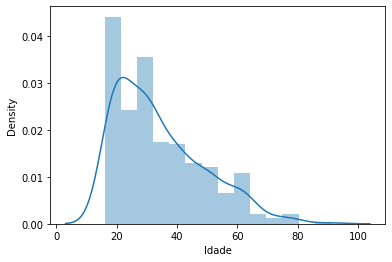

In [ ]:
sns.distplot(df2["Idade"], kde=True)

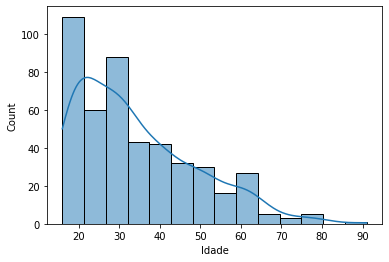

In [ ]:
sns.histplot(df2["Idade"], kde=True)
plt.show()

In [36]:
fig = px.histogram(df2['Idade'],"Idade")
fig.show()

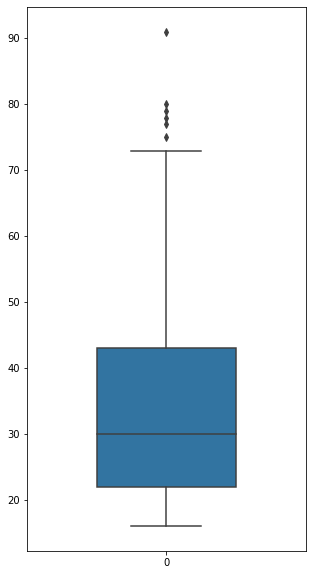

In [ ]:
plt.figure(figsize=(5,10))
sns.boxplot(data=df2["Idade"],orient="v", width=0.5)
plt.show()

In [ ]:
fig = px.box(df2, y='Idade')
fig.show()

In [ ]:
"média, mediana, moda, desvio-padrão, coeficiente de variação e simetria das variáveis quantitativas"
print(f"Média aritmética: {df2.Idade.mean():.2f}")
print(f"Médiana: {df2.Idade.median()}")
print(f"Moda: {st.mode(df2.Idade)}")
print(f"Desvio Padrão: {st.stdev(df2.Idade):.2f}")
print(f"Média Harmonica: {(st.harmonic_mean(df2.Idade)):.2f}")
print(f'Coeficiente de Variação: {cv(df2.Idade):.2f}')
print('Quartil: (Min, Q1, Q2, Q3, Max) ', np.quantile(df2.Idade, [0, 0.25, 0.5, 0.75, 1]))

Média aritmética: 34.18
Médiana: 30.0
Moda: 18
Desvio Padrão: 14.67
Média Harmonica: 28.92
Coeficiente de Variação: 42.93
Quartil: (Min, Q1, Q2, Q3, Max)  [16. 22. 30. 43. 91.]


## Genero

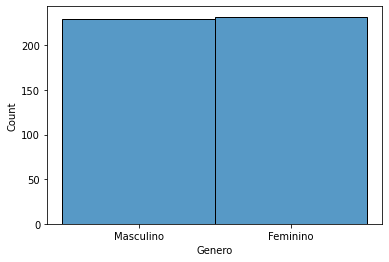

In [ ]:
sns.histplot(df2["Genero"])

## Nota Atual prefeito

In [ ]:
# df['Quest. 13'].fillna(0, inplace = True)

In [ ]:
# df['Quest. 13']

## Escolaridade

In [ ]:
cont_escolaridade = df2["Escolaridade"].value_counts()
cont_escolaridade

Médio Completo         155
Fundam. Incompleto     111
Médio incompleto        73
Não Alfabetizado        29
Fundam. Completo        28
Apenas Alfabetizado     26
Superor incompleto      20
Superior Completo       19
Name: Escolaridade, dtype: int64

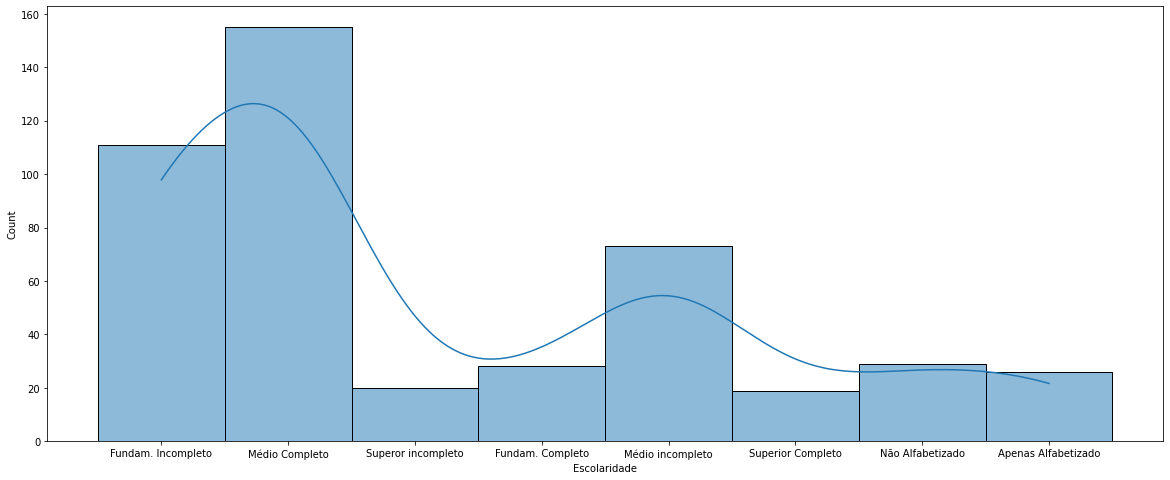

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data = df2,x = "Escolaridade", kde=True, legend=True, stat='count',element ="bars")
plt.show()

## Votos

## Comparar a média de um campo numérico em relação a um campo categórico e responder se existe diferença estatística ao nível de 5% de significância;

## Idade X Escolaridade

---



In [ ]:
Escolaridade_Idade = df2.groupby(['Escolaridade', 'Faixa']).count()
Escolaridade_Idade

In [ ]:
Escolaridade_Idade.keys()

In [ ]:
Escolaridade_Idade['Idade']

In [ ]:
# x=['b', 'a', 'c', 'd']
fig = go.Figure(go.Bar(x=Escolaridade_Idade.keys(), y=[2,5,1,9], name='Montreal'))
fig.add_trace(go.Bar(x=Escolaridade_Idade.keys(), y=[1, 4, 9, 16], name='Ottawa'))
fig.add_trace(go.Bar(x=Escolaridade_Idade.keys(), y=[6, 8, 4.5, 8], name='Toronto'))

fig.update_layout(barmode='stack')
fig.update_xaxes(categoryorder='array', categoryarray= ['d','a','c','b'])
fig.show()

## Escolaridade X Voto


---




In [ ]:
intecao_escolaridade = df2.groupby(['Intencao', 'Escolaridade']).count()
intecao_escolaridade

Idade  Faixa  ...  Por Omar  Por Braga
Intencao  Escolaridade                       ...                     
Adail     Apenas Alfabetizado     19     19  ...        19         19
          Fundam. Completo        14     14  ...        14         14
          Fundam. Incompleto      47     47  ...        47         47
          Médio Completo          53     53  ...        53         53
          Médio incompleto        30     30  ...        30         30
          Não Alfabetizado         7      7  ...         7          7
          Superior Completo        2      2  ...         2          2
          Superor incompleto       2      2  ...         2          2
C.T.      Fundam. Incompleto       1      1  ...         1          1
Iran      Fundam. Incompleto       1      1  ...         1          1
          Médio Completo           3      3  ...         3          3
          Médio incompleto         3      3  ...         3          3
Magalhaes Apenas Alfabetizado      3      3  ...         3          3
          Fundam. Completo        10     10  ...        10         10
          Fundam. Incompleto      27     27  ...        27         27
          Médio Completo          47     47  ...        47         47
          Médio incompleto        24     24  ...        24         24
          Não Alfabetizado         5      5  ...         5          5
          Superior Completo       11     11  ...        11         11
          Superor incompleto      10     10  ...        10         10
Mitouso   Fundam. Completo         2      2  ...         2          2
          Fundam. Incompleto       7      7  ...         7          7
          Médio Completo          20     20  ...        20         20
          Médio incompleto         3      3  ...         3          3
          Não Alfabetizado         8      8  ...         8          8
          Superior Completo        2      2  ...         2          2
          Superor incompleto       3      3  ...         3          3
Nulo      Fundam. Completo         1      1  ...         1          1
          Fundam. Incompleto       7      7  ...         7          7
          Médio Completo           7      7  ...         7          7
          Médio incompleto         1      1  ...         1          1
          Não Alfabetizado         1      1  ...         1          1
          Superior Completo        1      1  ...         1          1
          Superor incompleto       2      2  ...         2          2
f         Fundam. Completo         1      1  ...         1          1
          Fundam. Incompleto       9      9  ...         9          9
          Médio Completo          13     13  ...        13         13
          Médio incompleto         4      4  ...         4          4
          Não Alfabetizado         1      1  ...         1          1
          Superior Completo        1      1  ...         1          1
          Superor incompleto       1      1  ...         1          1
g         Médio Completo           1      1  ...         1          1
h         Superior Completo        1      1  ...         1          1
indeciso  Fundam. Incompleto       2      2  ...         2          2
          Médio Completo           3      3  ...         3          3
          Médio incompleto         2      2  ...         2          2
          Superior Completo        1      1  ...         1          1
          Superor incompleto       1      1  ...         1          1

[48 rows x 7 columns]

Idade X Voto


---



---



### Questão 9

In [ ]:
qt9 = df2['Por Omar'].value_counts()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=qt9.keys(),values=qt9.values,title="Votaria no candidato indicado por Omar")])
fig.show()

## Questão 10

In [ ]:
qt10 = df2['Por Braga'].value_counts()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=qt10.keys(),values=qt10.values,pull=[0.1,0.2,0.3])])
fig.show()

#Usando a Base de Dados Original

In [ ]:
# Substituindo os nomes dos candidatos
df["Quest. 15"].replace(candidatos, inplace=True)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wfsilva-uea/coari/master/coari_db.csv", dtype=types)

## Questao 16

In [ ]:
# As respostas na base nao estao condizentes com a pergunta
qt16 = df['Quest. 16'].value_counts()
qt16

c                      231
e                       69
b                       49
d                       31
indicado pelo adail     13
a                       11
indeciso                10
f                        2
g                        1
Name: Quest. 16, dtype: int64

In [ ]:
fig = go.Figure(data=[go.Pie(labels=qt16.keys(),values=qt16.values)])
fig.show()

In [9]:
df2.head()

,Idade,Faixa,Bairro,Genero,Prioridade,Intencao,Por Omar,Por Braga,Escolaridade,Renda
0,42,40 a 49,Urucu,Masculino,Salário,Adail,Sim,Sim,Fundam. Incompleto,1000.0
1,48,40 a 49,Itamarati,Masculino,Asfalto,indeciso,Sim,Sem Opinião,Médio Completo,1800.0
2,22,22 a 24,União,Masculino,Segurança,Magalhaes,Sim,Não,Superior Incompleto,2500.0
3,19,18 a 21,Itamarati,Feminino,Emprego,Mitouso,Sem Opinião,Sem Opinião,Médio Completo,1000.0
4,34,30 a 39,União,Feminino,Emprego,Adail,Sem Opinião,Sim,Médio Completo,500.0


In [10]:
df2.Intencao.value_counts()

Adail        174
Magalhaes    137
Mitouso       45
f             30
Nulo          20
indeciso       9
Iran           7
h              1
g              1
C.T.           1
Name: Intencao, dtype: int64

In [37]:
intencao_adail = df2.query('`Intencao` == "Adail"')
intencao_magalhaes = df2.query('`Intencao` == "Magalhaes"')
intencao_mitouso = df2.query('`Intencao` == "Mitouso"')
intencao_nulo = df2.query('`Intencao` == "Nulo"')
intencao_indeciso = df2.query('`Intencao` == "indeciso"')

In [38]:
intencao_adail.Faixa.value_counts()

30 a 39    46
25 a 29    28
40 a 49    27
18 a 21    27
50 a 59    15
22 a 24    14
60 e +      9
16 e 17     8
Name: Faixa, dtype: int64

In [42]:
intencao_magalhaes.Faixa.value_counts()

18 a 21    33
22 a 24    19
25 a 29    19
30 a 39    18
40 a 49    16
50 a 59    13
16 e 17    10
60 e +      9
Name: Faixa, dtype: int64

In [39]:
hist_data = [intencao_adail.Faixa.value_counts(),intencao_magalhaes.Faixa.value_counts(),intencao_mitouso.Faixa.value_counts()]
labels = ["Adail", "Magalhaes", "Mitouso"]

In [41]:
fig = ff.create_distplot(hist_data,labels, bin_size=.2, show_rug=False)
fig.show()

In [50]:
# Percentual de Intenção de Votos
fig = go.Figure(data=[go.Pie(labels=df2['Intencao'].value_counts().keys(), values = df2['Intencao'].value_counts().values, pull=[0.2])])
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=qt16.keys(),values=qt16.values)])
fig.show()